# How do we find clusters?

Humans are quite good in quickly finding clusters when looking at the data visualizations above. The problem is, how to make a machine find clusters.

http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py

## Meanshift
sklearn.cluster.Meanshift
#### Bandwith is the size of the cirle
And below shows how a window is moving into the center of a cluster
![](images/meanshift.gif)
The cirle window above would be one of many windows that are distributed over the feature space.
The circle moves towards the highest density of feature vectors. The mean of the distance to each neighbour is calculated and the circle is moved to the mean value. This happens over several iterations untill all windows are finished moving. Finally all windows on same location are merged and all features are moved to neares cluster.

Choosing initial number of windows, size of windows, distance between neighbours etc. 
![](https://i.stack.imgur.com/A871k.jpg)


In [1]:
%pylab inline 
from sklearn.cluster import MeanShift, estimate_bandwidth
# The bandwidth is the distance/size scale of the kernel function, i.e. 
# sklearn.cluster module offers an estimate_bandwith() function based on a nearest-neighbor analysis.
# quantile should be between [0, 1] 0.5 means that the median of all pairwise distances is used

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

Populating the interactive namespace from numpy and matplotlib


## Create sample data for 1d, 2d and 3d feature spaces

shape data (400, 1) [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


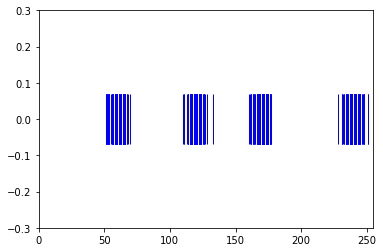

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


centers = [[60], [120], [170], [240]]
data, _ = make_blobs(n_samples=400, cluster_std=4, centers=centers)
data_1d = np.rint(data).astype(np.uint8) # round to nearest integer (400 values)
y = np.zeros(np.shape(data))

plt.xlim(0, 255)
plt.ylim(-0.3, 0.3)

print('shape data',np.shape(data),np.zeros(np.shape(data))[0:5]) # x = clustered values, y = 0

plt.plot(data_1d , y, 'b|', ms=50) # plot rounded x values and y = 0
#plt.axis('off') # turn off axis lines and labels
plt.show()

Number of estimated clusters : 4


<IPython.core.display.Javascript object>


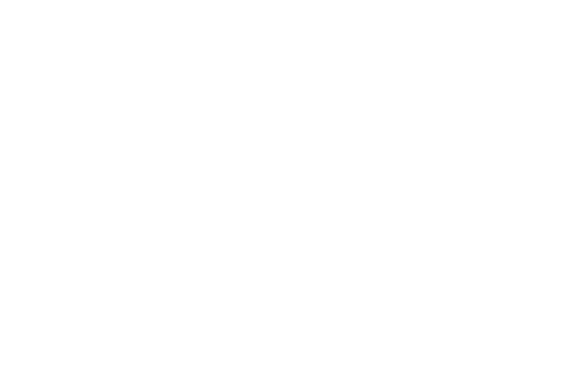

<IPython.core.display.Javascript object>


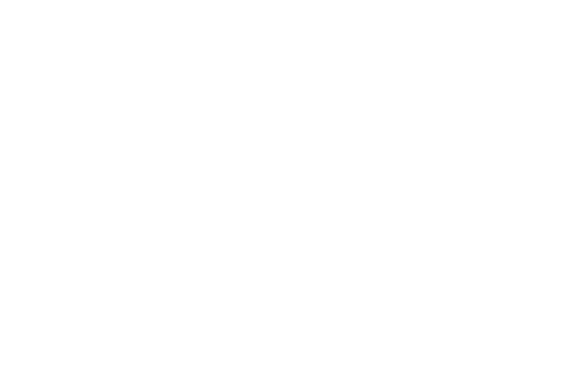

In [3]:
%matplotlib notebook
from itertools import cycle

labels, cluster_centers, n_clusters = mean_shift(data_1d)

plt.cla()
plt.xlim(0, 255)
plt.ylim(-0.3, 0.3)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x = data_1d[my_members, 0]
    y = np.zeros(np.shape(x))

    plt.plot(x , y, col + '|', ms=50)
    plt.plot(cluster_center[0] , 0, 'k|', ms=70)

plt.show()

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


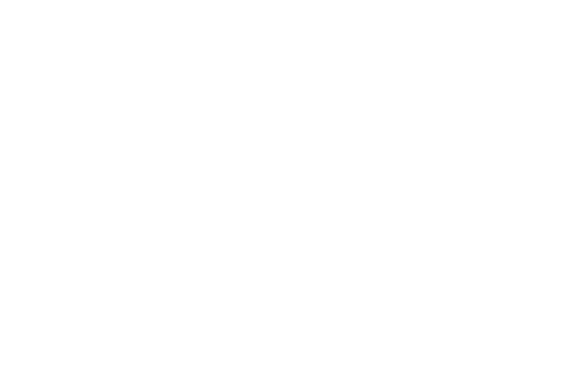

In [4]:
%matplotlib notebook
from itertools import cycle

centers = [[2, 1], [0, 0], [1, -1]] # centers are now 2-d
data_2d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.1)

labels, cluster_centers, n_clusters = mean_shift(data_2d)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


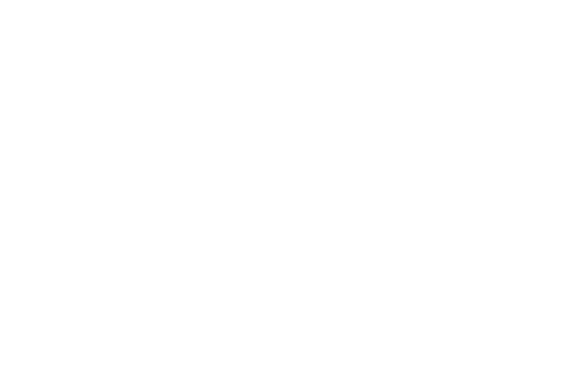

In [5]:
%matplotlib notebook
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D

centers = [[2, 1, 0], [0, -1, -1], [1, -1, 3]]
data_3d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.37)

labels, cluster_centers, n_clusters = mean_shift(data_3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = data_3d[my_members,0], data_3d[my_members,1], data_3d[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

## Exercise meanshift
1. load 'iris_data.csv' into a dataframe
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)

## What else can we use this for?

For example for **image segmentation**: 

Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics. [Source]()https://en.wikipedia.org/wiki/Image_segmentation

[[[101 150 160]
  [ 12  61  71]
  [  0  44  57]
  ...
  [ 52 120 127]
  [ 90 164 146]
  [120 195 167]]

 [[ 48 112 130]
  [ 52 106 123]
  [ 13  47  60]
  ...
  [104 143 121]
  [121 157 140]
  [100 136 120]]

 [[  9  88  97]
  [ 54 116 127]
  [ 17  43  59]
  ...
  [ 73 103 108]
  [ 58  86  97]
  [ 52  78  94]]

 ...

 [[154 151 120]
  [150 153 121]
  [148 162 126]
  ...
  [ 59  87  87]
  [ 65  94  98]
  [ 49  79  84]]

 [[160 163 137]
  [148 152 127]
  [124 136 114]
  ...
  [ 88  74  80]
  [ 88  72  83]
  [ 81  64  78]]

 [[ 24  13   9]
  [ 26   5   3]
  [ 51  10   7]
  ...
  [  1   6   7]
  [  1  10  14]
  [  0   0   8]]]


<IPython.core.display.Javascript object>


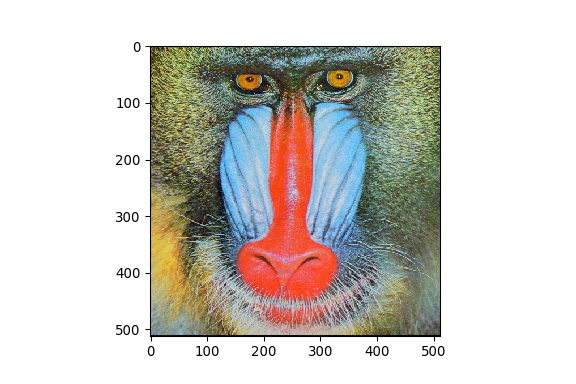

In [6]:
%matplotlib notebook
import os
import cv2
from modules import webget

# url = 'https://github.com/opencv/opencv/raw/master/samples/data/rubberwhale2.png'
url = 'https://github.com/opencv/opencv/raw/master/samples/data/baboon.jpg'
# url = 'https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg'
webget.download(url,'data/baboon.jpg')

#img = cv2.imread(os.path.basename(url))
img = cv2.imread('data/baboon.jpg')
print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

plt.imshow(img, interpolation='none')

![](data/baboon.jpg)

In [7]:
lab_image = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
img = cv2.medianBlur(lab_image, 5)
    
img_lst = img.reshape((img.shape[0] * img.shape[1], 3))
img_lst_orig = np.copy(img_lst) 

labels, cluster_centers, n_clusters = mean_shift(img_lst)

label_img = labels.reshape(height, width)
for l in range(n_clusters):
    img[label_img == l] = cluster_centers[l]

rgb_segments = cv2.cvtColor(img, cv2.COLOR_Lab2RGB)

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


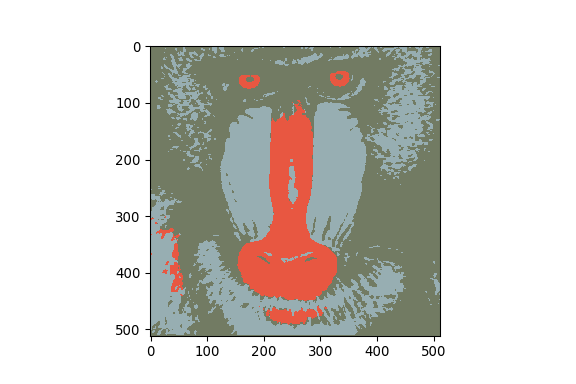

In [8]:
plt.figure() 
plt.imshow(rgb_segments, interpolation='none')

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


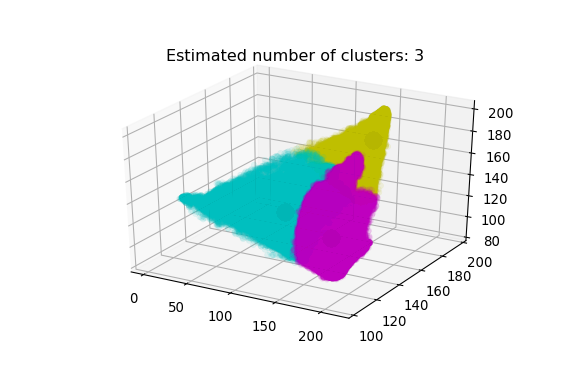

In [9]:
from itertools import cycle

labels, cluster_centers, n_clusters = mean_shift(img_lst_orig)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('cmybgr')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = img_lst_orig[my_members,0], img_lst_orig[my_members,1], img_lst_orig[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

In [10]:
print(cluster_centers)

[[128.63331918 120.5924825  140.09281334]
 [177.4323413  121.70040534 123.65599703]
 [144.54340266 183.3643416  170.54918745]]


# Self study on meanshift

  * http://stackoverflow.com/a/17912660
  * http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/
  * https://en.wikipedia.org/wiki/Mean_shift
  * https://github.com/mattnedrich/MeanShift_py

```bash
git clone https://github.com/mattnedrich/MeanShift_py.git
```

The following is the entry from Stackoverflow http://stackoverflow.com/a/17912660 explaining the mean shift algorithm.